<a href="https://colab.research.google.com/github/JuliaAbramczyk/UczenieMaszynowePD/blob/main/pd1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

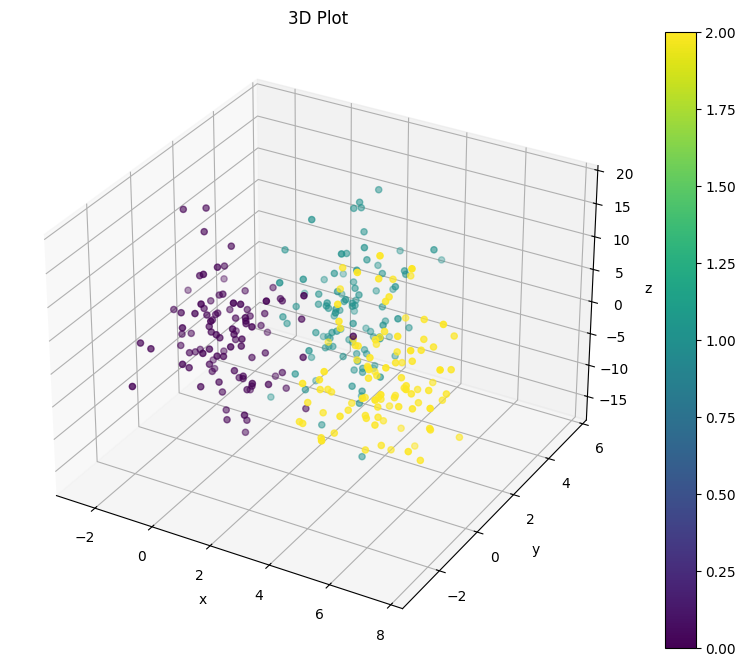

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Wczytanie danych
url = "https://github.com/tomczj/ML24_25/blob/main/24_02_25/PCA_three_clusters_data.csv?raw=true"
data = pd.read_csv(url)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['x'], data['y'], data['z'], c=data['class'], cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D Plot')
plt.colorbar(scatter)
plt.show()

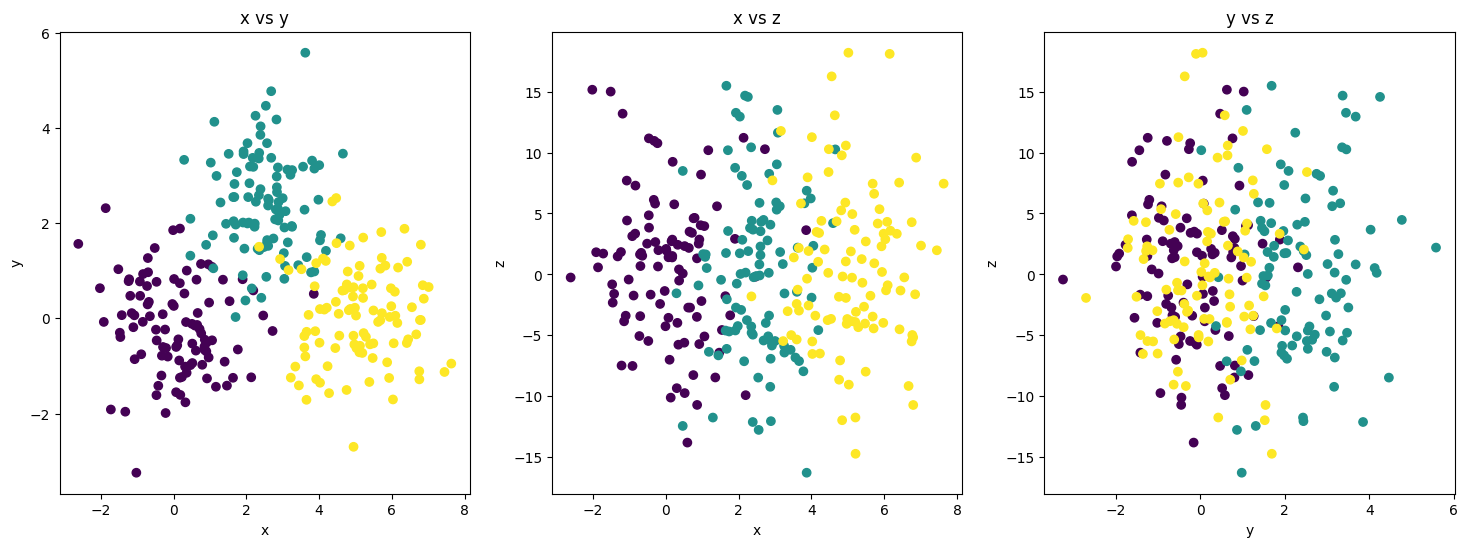

In [15]:
# Wizualizacja oryginalnych danych
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# x vs y
axes[0].scatter(data['x'], data['y'], c=data['class'], cmap='viridis')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('x vs y')

# x vs z
axes[1].scatter(data['x'], data['z'], c=data['class'], cmap='viridis')
axes[1].set_xlabel('x')
axes[1].set_ylabel('z')
axes[1].set_title('x vs z')

# y vs z
axes[2].scatter(data['y'], data['z'], c=data['class'], cmap='viridis')
axes[2].set_xlabel('y')
axes[2].set_ylabel('z')
axes[2].set_title('y vs z')

plt.show()

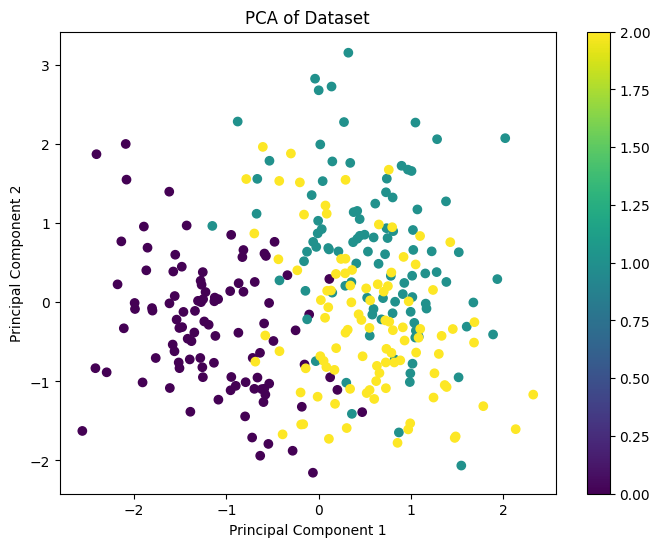

Kierunki głównych składowych (wektory własne):
[[ 0.72005783  0.56946    -0.39652494]
 [-0.02368275  0.59126692  0.80612813]]


In [16]:
# Standardyzacja danych
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data[['x', 'y', 'z']])

# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_standardized)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['class'] = data['class']

# Wizualizacja PCA
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['class'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.colorbar()
plt.show()

pca_directions = pca.components_
print("Kierunki głównych składowych (wektory własne):")
print(pca_directions)

Pytanie 1

Przyglądając się rysunkom 2d widać, że najbardziej odseparowane są dane na wykresie x vs y. Po zastosowaniu PCA wymieszanie danych jest większe, co oznacza, że zastosowanie PCA nie zawsze musi prowadzić do zwiększenia separacji danych. Dzieje się tak, ponieważ principal components nie pokryły się z podziałem na klasy. Analizując wykres 3D, łatwo zrozumieć, skąd taki efekt — patrząc wzdłuż kierunku o największej wariancji, widać, że zielona i żółta chmura punktów częściowo się nakładają, natomiast fioletowa znajduje się wyraźnie z boku, oddzielona od pozostałych.

Pytanie 2

Standardyzacja jest konieczna przed zastosowaniem PCA, ponieważ PCA jest wrażliwa na skalę cech. Jeśli cechy mają różne skale (np. jedna cecha ma wartości w zakresie 0–100, a druga w zakresie 0–1), PCA może być zdominowana przez cechy o większych wartościach, co prowadzi do błędnych wyników.

W przypadku tych danych, standardyzacja zapewnia, że każda cecha (x, y, z) ma średnią 0 i wariancję 1. Dzięki temu wszystkie cechy są traktowane równomiernie, a główne składowe są obliczane w sposób obiektywny, niezależnie od oryginalnych skal cech. Bez standardyzacji PCA mogłoby błędnie przypisywać większe znaczenie cechom o większych wartościach, co mogłoby zniekształcić wyniki analizy.